In [151]:
import numpy as np 
import pandas as pd 

In [152]:
import chardet

with open('spam.csv', 'rb') as file:
    result = chardet.detect(file.read())
print(result['encoding'])

Windows-1252


In [153]:
data = pd.read_csv('spam.csv', encoding='Windows-1252')

In [154]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1330,ham,"Aight no rush, I'll ask jay",NaN,NaN,NaN
1890,ham,Ok but knackered. Just came home and went to s...,NaN,NaN,NaN
4263,ham,She just broke down a list of reasons why nobo...,NaN,NaN,NaN
4451,ham,I've told you everything will stop. Just dont ...,NaN,NaN,NaN
2263,spam,Not heard from U4 a while. Call 4 rude chat pr...,NaN,NaN,NaN


In [155]:
data.shape

(5572, 5)

In [156]:
#data Cleaning
#EDA
#Text PReprocesing
#Model Building
#Evalution
#Improvement

Data Cleaning

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [158]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [159]:
data.sample(5)

,v1,v2
2338,ham,"Alright, see you in a bit"
17,ham,Eh u remember how 2 spell his name... Yes i di...
2988,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...
3054,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...
1769,ham,Ha... Both of us doing e same thing. But i got...


In [160]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
2190,ham,"Ooh, 4got, i'm gonna start belly dancing in mo..."
3360,ham,You only hate me. You can call any but you did...
1616,ham,"K, makes sense, btw carlos is being difficult ..."
906,spam,"all the lastest from Stereophonics, Marley, Di..."
1918,ham,Is fujitsu s series lifebook good?


In [161]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['target']=encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [162]:
data.isna().sum()

target    0
text      0
dtype: int64

In [163]:
data.duplicated().sum()

np.int64(403)

In [164]:
data=data.drop_duplicates(keep='first')

In [165]:
data.duplicated().sum()

np.int64(0)

In [166]:
data.shape

(5169, 2)

EDA

In [167]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

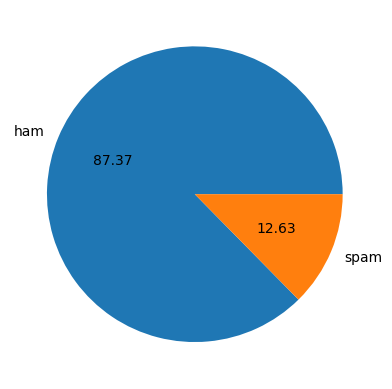

In [168]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [169]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [170]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bvija\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bvija\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [171]:
data['num_char']=data['text'].apply(len)
data.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [172]:
from nltk.tokenize import word_tokenize
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [173]:
data['num_sentence']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [174]:
data[['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [175]:
data[data['target']==0][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [176]:
data[data['target']==1][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

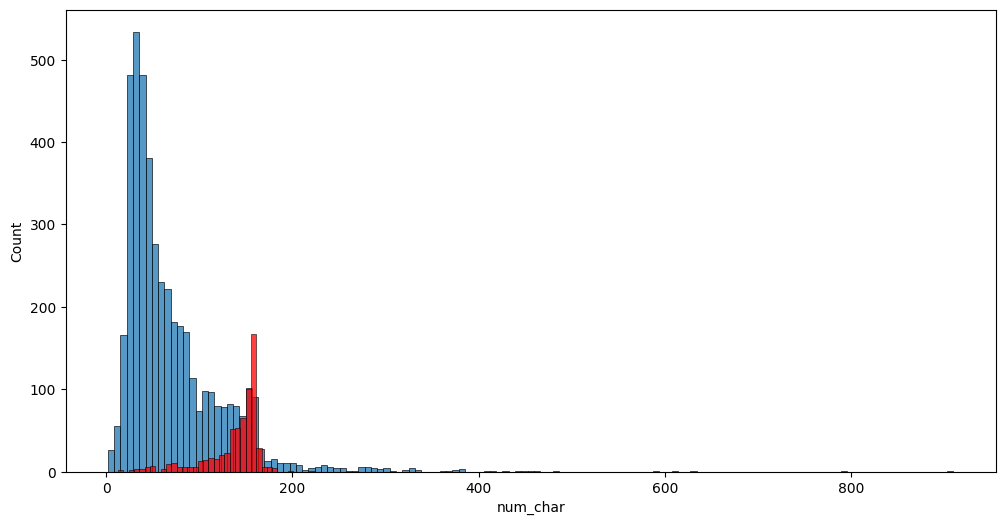

In [177]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_char'])
sns.histplot(data[data['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

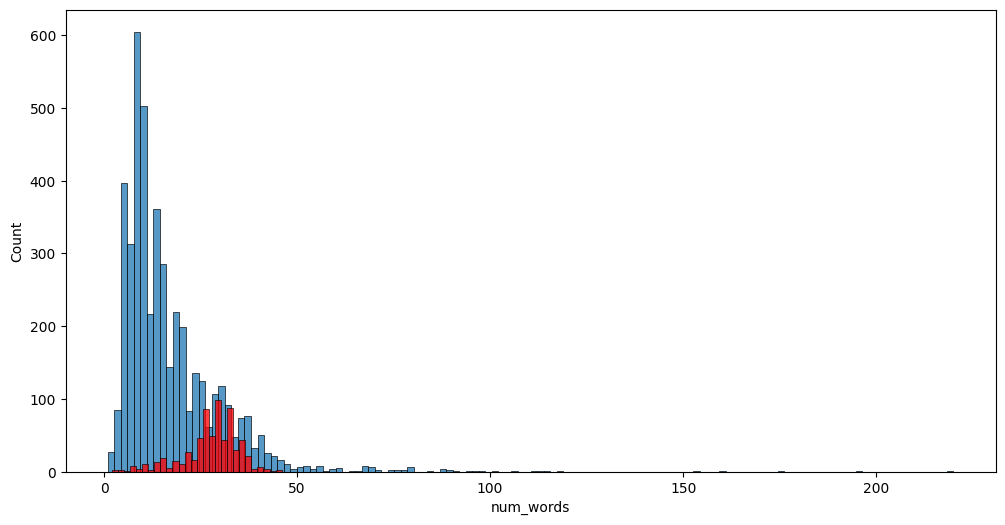

In [178]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

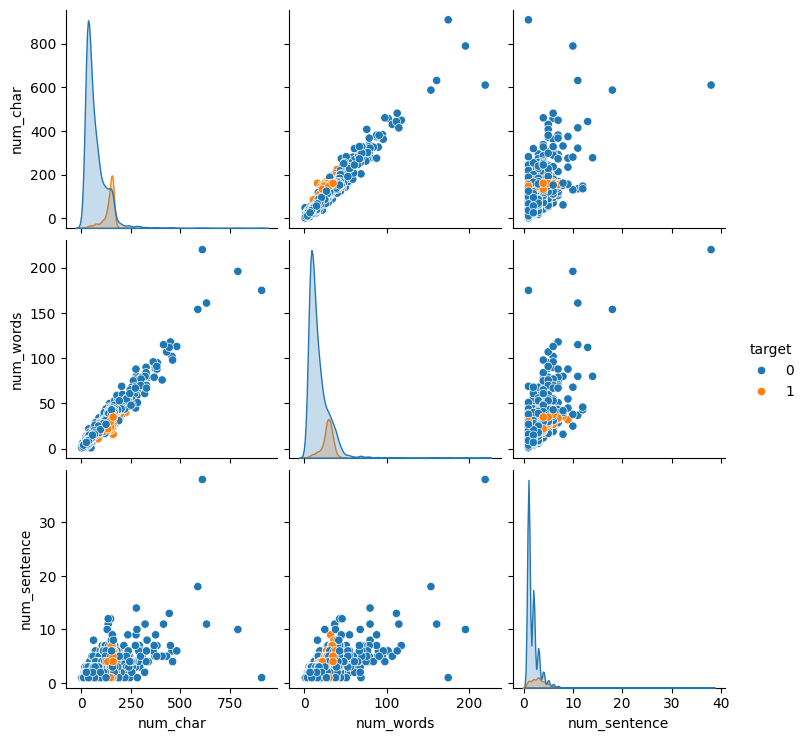

In [179]:
sns.pairplot(data,hue='target')

<Axes: >

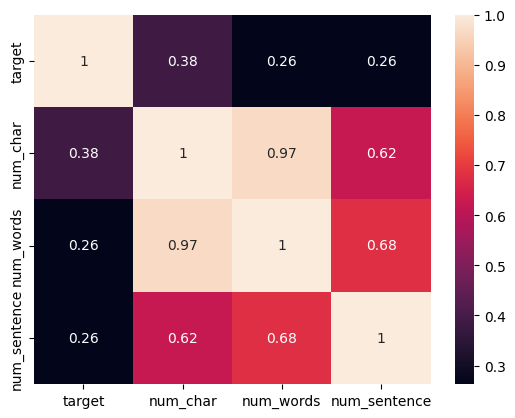

In [180]:
sns.heatmap(data[['target','num_char','num_words','num_sentence']].corr(),annot=True)

Data Preprocessing
lower case
tokenization
remove special char,stopwords,punct
stemming

In [181]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bvija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear() 
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)       
    text=y[:]
    y.clear() 
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [183]:
data['transformed_text']=data['text'].apply(transform_text)
data.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [184]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [185]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

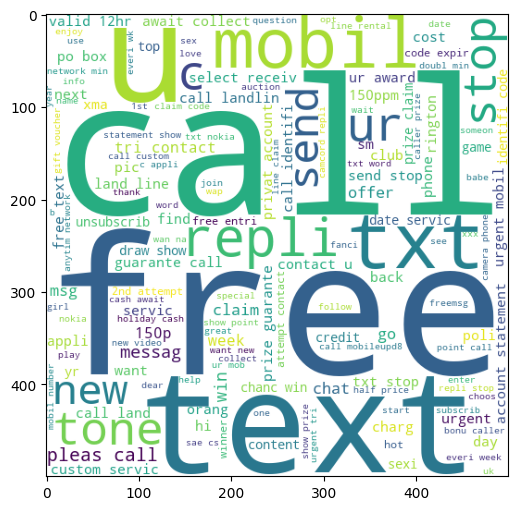

In [186]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

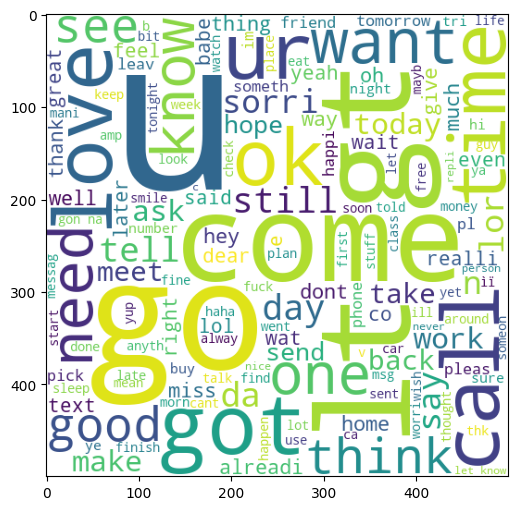

In [187]:
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [188]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

C:\Users\bvija\AppData\Local\Temp\ipykernel_24880\2904684785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette='rainbow')


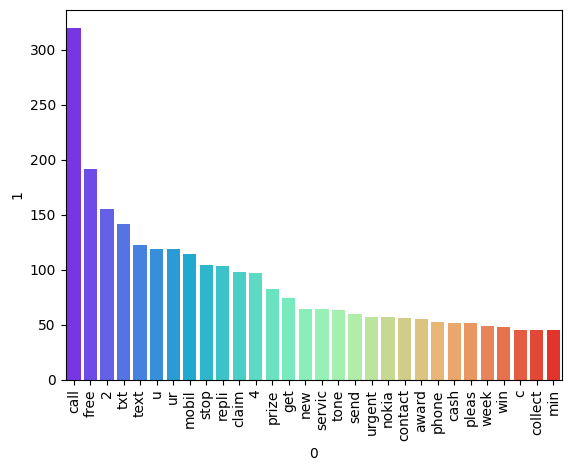

In [189]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

In [190]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

C:\Users\bvija\AppData\Local\Temp\ipykernel_24880\2814762720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette='rainbow')


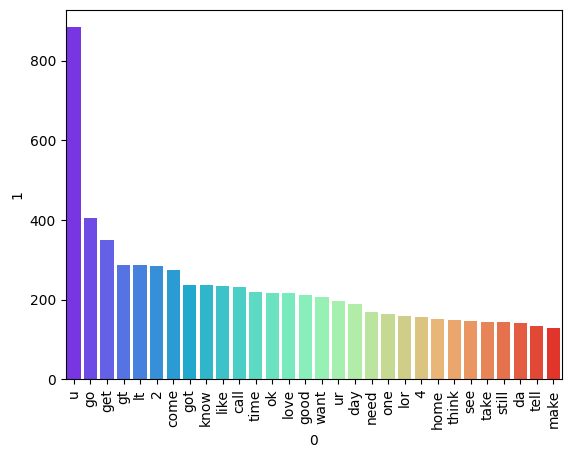

In [191]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [192]:
data.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [193]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()
tfidf1=TfidfVectorizer(max_features=3000)
X=cv.fit_transform(data['transformed_text']).toarray()
X1=tfidf.fit_transform(data['transformed_text']).toarray()
X2=tfidf.fit_transform(data['transformed_text']).toarray()

In [194]:
X.shape

(5169, 6708)

In [195]:
y=data['target'].values

In [196]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y,test_size=0.2,random_state=2)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y,test_size=0.2,random_state=2)

In [198]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb1=GaussianNB()
mnb1=MultinomialNB()
bnb1=BernoulliNB()
gnb2=GaussianNB()
mnb2=MultinomialNB()
bnb2=BernoulliNB()

In [199]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [200]:
gnb1.fit(X1_train,y1_train)
y1_pred1=gnb1.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [201]:
gnb2.fit(X2_train,y2_train)
y2_pred1=gnb2.predict(X2_test)
print(accuracy_score(y2_test,y2_pred1))
print(confusion_matrix(y2_test,y2_pred1))
print(precision_score(y2_test,y2_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [202]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [203]:
mnb1.fit(X1_train,y1_train)
y1_pred2=mnb1.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [204]:
mnb2.fit(X2_train,y2_train)
y2_pred2=mnb2.predict(X2_test)
print(accuracy_score(y2_test,y2_pred2))
print(confusion_matrix(y2_test,y2_pred2))
print(precision_score(y2_test,y2_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [205]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [206]:
bnb1.fit(X1_train,y1_train)
y1_pred3=bnb1.predict(X1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [207]:
bnb2.fit(X2_train,y2_train)
y2_pred3=bnb2.predict(X2_test)
print(accuracy_score(y2_test,y2_pred3))
print(confusion_matrix(y2_test,y2_pred3))
print(precision_score(y2_test,y2_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


tfidf+mnb

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [209]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [210]:
clfs={
    'SVC': svc,
    'KN' : knc,
    'NB': mnb,
    'DT':dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'Xgb': xgb,
}

In [211]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [212]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [213]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.925531914893617
Precision -  0.9420289855072463
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9197292069632496
Precision -  0.9365079365079365
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  Xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [214]:
accuracy_scores1=[]
precision_scores1=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X1_train,y1_train,X1_test,y1_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores1.append(current_accuracy)
    precision_scores1.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  Xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [215]:
accuracy_scores2=[]
precision_scores2=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X2_train,y2_train,X2_test,y2_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores2.append(current_accuracy)
    precision_scores2.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  Xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [216]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Accuracy', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.976789,0.991379
10,Xgb,0.973888,0.966387
5,RF,0.971954,1.000000
4,LR,0.970986,0.973684
2,NB,0.964217,0.834437
7,BgC,0.962282,0.915966
9,GBDT,0.943907,0.944444
0,SVC,0.926499,0.742188
3,DT,0.925532,0.942029
6,AdaBoost,0.919729,0.936508


In [217]:
performance1_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores1,'Precision':precision_scores1}).sort_values(by='Accuracy', ascending=False)
performance1_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
8,ETC,0.972921,0.982456
10,Xgb,0.972921,0.943548
5,RF,0.971954,1.000000
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.937137,0.854369
6,AdaBoost,0.924565,0.840909


In [218]:
performance2_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores2,'Precision':precision_scores2}).sort_values(by='Accuracy', ascending=False)
performance2_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
8,ETC,0.972921,0.982456
10,Xgb,0.972921,0.943548
5,RF,0.971954,1.000000
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.936170,0.846154
6,AdaBoost,0.924565,0.840909


In [219]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.976789
1,Xgb,Accuracy,0.973888
2,RF,Accuracy,0.971954
3,LR,Accuracy,0.970986
4,NB,Accuracy,0.964217
5,BgC,Accuracy,0.962282
6,GBDT,Accuracy,0.943907
7,SVC,Accuracy,0.926499
8,DT,Accuracy,0.925532
9,AdaBoost,Accuracy,0.919729


In [220]:
performance1_df1 = pd.melt(performance1_df,id_vars="Algorithm")
performance1_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,ETC,Accuracy,0.972921
2,Xgb,Accuracy,0.972921
3,RF,Accuracy,0.971954
4,NB,Accuracy,0.959381
5,BgC,Accuracy,0.958414
6,GBDT,Accuracy,0.952611
7,LR,Accuracy,0.951644
8,DT,Accuracy,0.937137
9,AdaBoost,Accuracy,0.924565


In [221]:
performance2_df1 = pd.melt(performance2_df,id_vars="Algorithm")
performance2_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,ETC,Accuracy,0.972921
2,Xgb,Accuracy,0.972921
3,RF,Accuracy,0.971954
4,NB,Accuracy,0.959381
5,BgC,Accuracy,0.958414
6,GBDT,Accuracy,0.952611
7,LR,Accuracy,0.951644
8,DT,Accuracy,0.936170
9,AdaBoost,Accuracy,0.924565


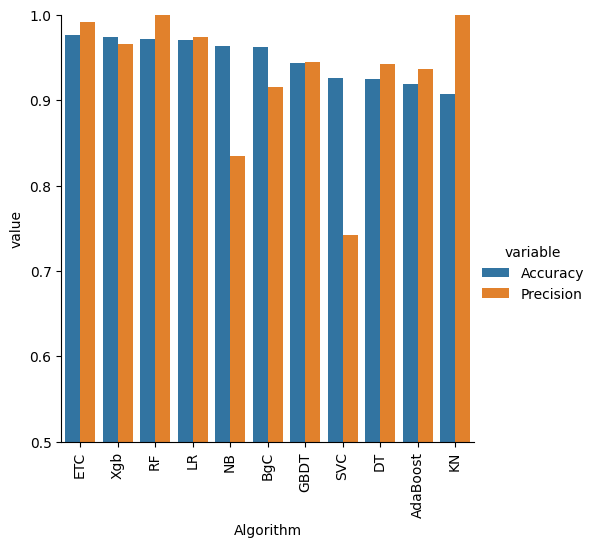

In [222]:
sns.catplot(x='Algorithm' ,y='value', hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

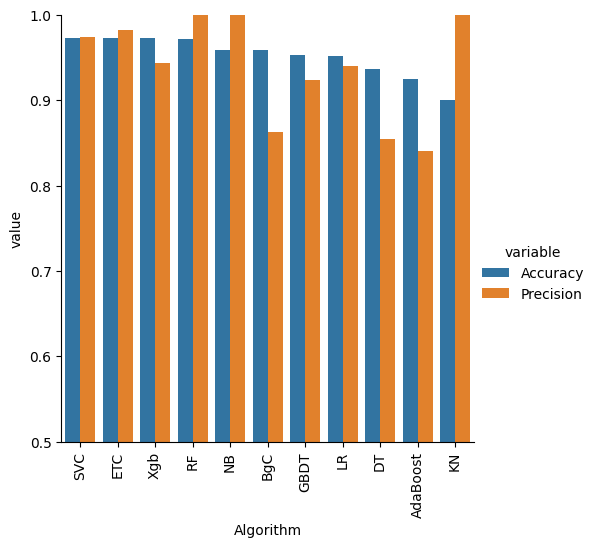

In [223]:
sns.catplot(x='Algorithm' ,y='value', hue='variable',data=performance1_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

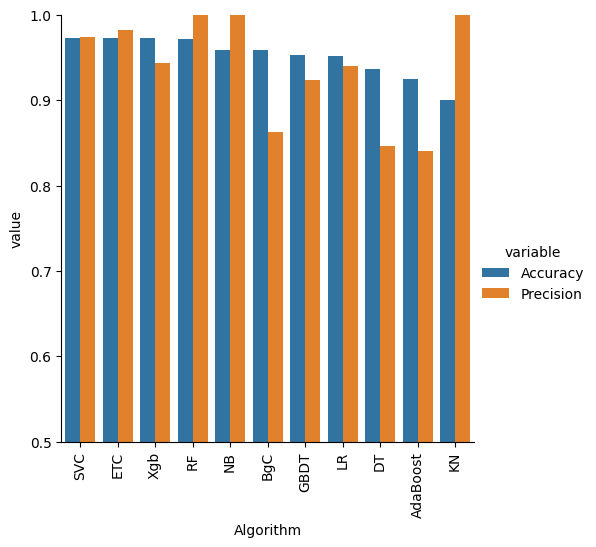

In [224]:
sns.catplot(x='Algorithm' ,y='value', hue='variable',data=performance2_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [225]:
performance_df.merge(performance2_df,on='Algorithm')

,Algorithm,Accuracy_x,Precision_x,Accuracy_y,Precision_y
0,ETC,0.976789,0.991379,0.972921,0.982456
1,Xgb,0.973888,0.966387,0.972921,0.943548
2,RF,0.971954,1.000000,0.971954,1.000000
3,LR,0.970986,0.973684,0.951644,0.940000
4,NB,0.964217,0.834437,0.959381,1.000000
5,BgC,0.962282,0.915966,0.958414,0.862595
6,GBDT,0.943907,0.944444,0.952611,0.923810
7,SVC,0.926499,0.742188,0.972921,0.974138
8,DT,0.925532,0.942029,0.936170,0.846154
9,AdaBoost,0.919729,0.936508,0.924565,0.840909


In [227]:
from sklearn.svm import SVC

svc = SVC(probability=True)

from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')
voting.fit(X_train,y_train)
y_predc=voting.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_predc))
print("Precision ",precision_score(y_test,y_predc))

Accuracy  0.9835589941972921
Precision  0.984


In [228]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_predc=clf.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_predc))
print("Precision ",precision_score(y_test,y_predc))

Accuracy  0.9816247582205029
Precision  0.968503937007874


In [230]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb2,open('model.pkl','wb'))